<a href="https://colab.research.google.com/github/Benji-Wagner/Coursework/blob/master/Image_Analysis_with_Masks_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Benji Wagner

## Prediction with MRI Scans

In this notebook, I am trying my hand at Deep Learning for the first time. If you're reading this and have any suggestions on how to improve my approach, send me an email at benjiwagner1234@gmail.com

For version control purposes, we choose to use tensorflow version 1.12.0

In [0]:
!pip install tensorflow==1.12.0

    100% |████████████████████████████████| 83.1MB 476kB/s 
    100% |████████████████████████████████| 3.1MB 12.2MB/s 
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [0]:
# input image dimensions
img_rows, img_cols = 256, 256

In [0]:
labels = np.load("/content/gdrive/My Drive/Data/labels.npy")
images_with_masks = np.load("/content/gdrive/My Drive/Data/useful_masks.npy")

## Hyperparameters

In [0]:
batch_size = 64
num_classes = 2
epochs = 25
input_shape = (img_rows, img_cols, 3)

## Train/Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images_with_masks, labels, random_state = 2019, test_size = 0.33)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Straightforward Fitting

In [0]:
filepath="/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epochs, callbacks = callbacks_list, 
         validation_data = (X_test, y_test))
score = model.evaluate(x = X_test, y = y_test, verbose = 0)

Train on 903 samples, validate on 445 samples
Epoch 1/10
903/903 [==============================] - 174s 192ms/step - loss: 0.6282 - acc: 0.6429 - val_loss: 0.5564 - val_acc: 0.7180

Epoch 00001: val_acc improved from -inf to 0.71798, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented.hdf5
Epoch 2/10
903/903 [==============================] - 172s 190ms/step - loss: 0.4439 - acc: 0.7984 - val_loss: 0.5197 - val_acc: 0.7124

Epoch 00002: val_acc did not improve from 0.71798
Epoch 3/10
903/903 [==============================] - 172s 190ms/step - loss: 0.3534 - acc: 0.8533 - val_loss: 0.4819 - val_acc: 0.7584

Epoch 00003: val_acc improved from 0.71798 to 0.75843, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented.hdf5
Epoch 4/10
903/903 [==============================] - 172s 190ms/step - loss: 0.2511 - acc: 0.9286 - val_loss: 0.4760 - val_acc: 0.7416

Epoch 00004: val_acc did not improve from 0.75843
Epoch

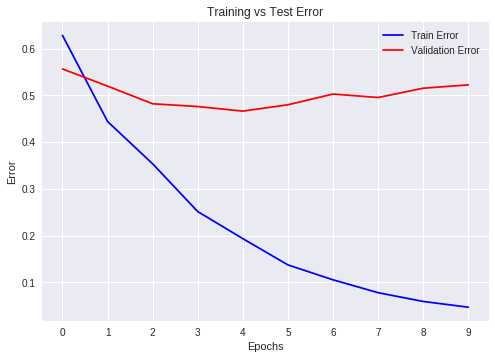

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, epochs, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_hiddenlayers1_nonaugmented_withmasks.png")

In [0]:
predictions = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

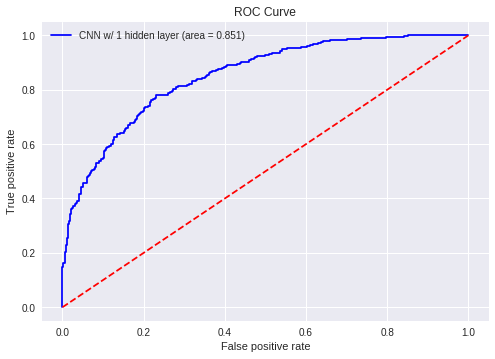

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 1 hidden layer (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_hiddenlayers1_nonaugmented_withmasks.png")

## Image Generators

In [0]:
data_gen_args = dict(horizontal_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zca_whitening=False)

In [0]:
image_datagen = ImageDataGenerator(**data_gen_args)
#test_datagen = ImageDataGenerator(zca_whitening=True)

In [0]:
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)
#validation_generator = image_datagen.flow(x = X_test, y = y_test, batch_size = batch_size)



In [0]:
filepath="/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
model.load_weights("/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator.hdf5")

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list,
    epochs=10)

Epoch 1/10
14/14 [==============================] - 179s 13s/step - loss: 0.6392 - acc: 0.6271 - val_loss: 0.6262 - val_acc: 0.6472

Epoch 00001: val_acc did not improve from 0.65393
Epoch 2/10
14/14 [==============================] - 174s 12s/step - loss: 0.6416 - acc: 0.6259 - val_loss: 0.6351 - val_acc: 0.6292

Epoch 00002: val_acc did not improve from 0.65393
Epoch 3/10
14/14 [==============================] - 173s 12s/step - loss: 0.6480 - acc: 0.6136 - val_loss: 0.6305 - val_acc: 0.6135

Epoch 00003: val_acc did not improve from 0.65393
Epoch 4/10
14/14 [==============================] - 173s 12s/step - loss: 0.6317 - acc: 0.6051 - val_loss: 0.6354 - val_acc: 0.6258

Epoch 00004: val_acc did not improve from 0.65393
Epoch 5/10
14/14 [==============================] - 173s 12s/step - loss: 0.6317 - acc: 0.6410 - val_loss: 0.6110 - val_acc: 0.6562

Epoch 00005: val_acc improved from 0.65393 to 0.65618, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_i

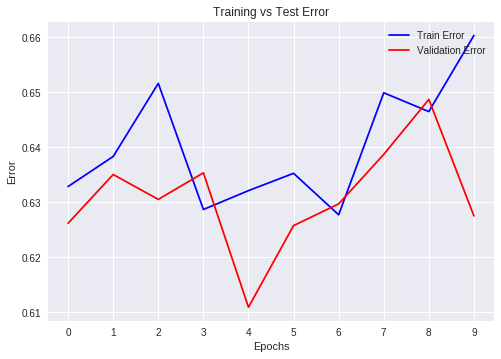

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 10, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_hiddenlayers1_augmented_withmasks.png")

In [0]:
predictions = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

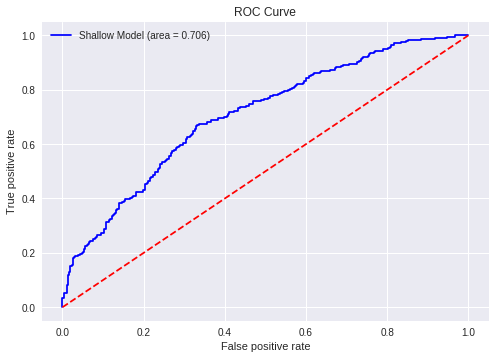

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 1 hidden layer (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_hiddenlayers1_augmented_withmasks.png")

### Different Image Augmentation

In [0]:
data_gen_args = dict(horizontal_flip=True)

In [0]:
image_datagen = ImageDataGenerator(**data_gen_args)

In [0]:
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)


In [0]:
filepath="/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator_hflip.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
#model.load_weights("/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator.hdf5")

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list,
    epochs=10)

Epoch 1/10
14/14 [==============================] - 164s 12s/step - loss: 0.6460 - acc: 0.6209 - val_loss: 0.6554 - val_acc: 0.6034

Epoch 00001: val_acc improved from -inf to 0.60337, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator_hflip.hdf5
Epoch 2/10
14/14 [==============================] - 163s 12s/step - loss: 0.5598 - acc: 0.6957 - val_loss: 0.6322 - val_acc: 0.6360

Epoch 00002: val_acc improved from 0.60337 to 0.63596, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator_hflip.hdf5
Epoch 3/10
14/14 [==============================] - 165s 12s/step - loss: 0.4833 - acc: 0.7353 - val_loss: 0.5726 - val_acc: 0.6787

Epoch 00003: val_acc improved from 0.63596 to 0.67865, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator_hflip.hdf5
Epoch 4/10
14/14 [==============================] - 164s 12s/step - loss: 0.4477 - acc: 0.7920 - val_loss: 0.5386 - val_a

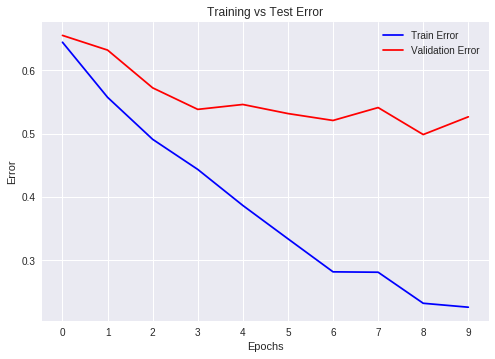

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 10, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_hiddenlayers1_augmented_withmasks_hflip.png")

In [0]:
predictions = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

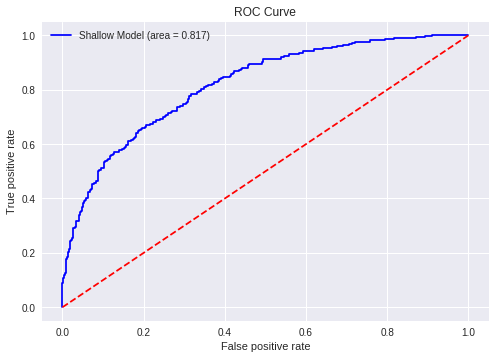

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 1 hidden layer (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_hiddenlayers1_augmented_withmasks_hflip.png")

# Different Model Structure: Two Hidden Layers

## Straightforward Fitting

In [0]:
filepath="/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented_twolayers.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epochs, callbacks = callbacks_list, 
         validation_data = (X_test, y_test))
score = model.evaluate(x = X_test, y = y_test, verbose = 0)

Train on 903 samples, validate on 445 samples
Epoch 1/10
903/903 [==============================] - 307s 339ms/step - loss: 0.6522 - acc: 0.6019 - val_loss: 0.6576 - val_acc: 0.6697

Epoch 00001: val_acc improved from -inf to 0.66966, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented_twolayers.hdf5
Epoch 2/10
903/903 [==============================] - 303s 335ms/step - loss: 0.5683 - acc: 0.6894 - val_loss: 0.5808 - val_acc: 0.6933

Epoch 00002: val_acc improved from 0.66966 to 0.69326, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented_twolayers.hdf5
Epoch 3/10
903/903 [==============================] - 303s 335ms/step - loss: 0.4966 - acc: 0.7337 - val_loss: 0.5520 - val_acc: 0.7326

Epoch 00003: val_acc improved from 0.69326 to 0.73258, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_nonaugmented_twolayers.hdf5
Epoch 4/10
903/903 [==============================] - 303s 3

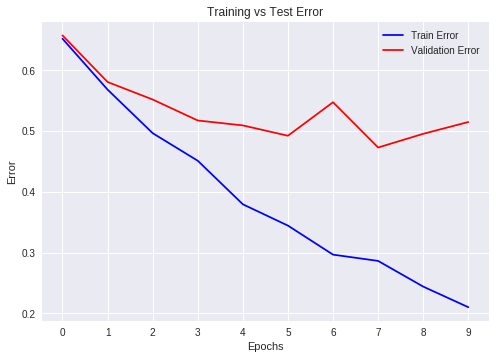

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 10, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_hiddenlayers1_augmented_withmasks.png")

In [0]:
predictions = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

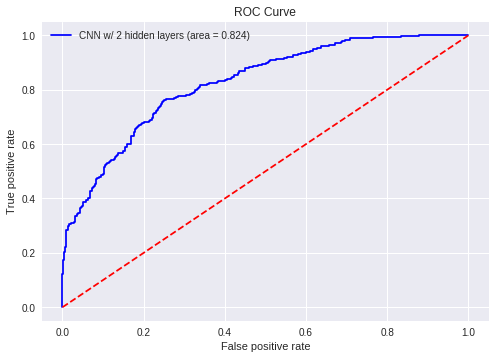

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 2 hidden layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_hiddenlayers2_nonaugmented_withmasks_layers.png")

## Image Augmentation

In [0]:
data_gen_args = dict(horizontal_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zca_whitening=False)

In [0]:
image_datagen = ImageDataGenerator(**data_gen_args)
#test_datagen = ImageDataGenerator(zca_whitening=True)

In [0]:
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)
#validation_generator = image_datagen.flow(x = X_test, y = y_test, batch_size = batch_size)



In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=10)

Epoch 1/10


In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 10, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

### Different Image Augmentation

In [0]:
data_gen_args = dict(horizontal_flip=True)

In [0]:
image_datagen = ImageDataGenerator(**data_gen_args)

In [0]:
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)


In [0]:
filepath="/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_augmented_twolayers_hflip.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
#model.load_weights("/content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_image_generator.hdf5")

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
hist = model.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    callbacks=callbacks_list,
    epochs=10)

Epoch 1/10
14/14 [==============================] - 293s 21s/step - loss: 0.6622 - acc: 0.5943 - val_loss: 0.6567 - val_acc: 0.6506

Epoch 00001: val_acc improved from -inf to 0.65056, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_augmented_twolayers_hflip.hdf5
Epoch 2/10
14/14 [==============================] - 270s 19s/step - loss: 0.5934 - acc: 0.6542 - val_loss: 0.6366 - val_acc: 0.6596

Epoch 00002: val_acc improved from 0.65056 to 0.65955, saving model to /content/gdrive/My Drive/Output/MRI_Model_Weights/best_weights_augmented_twolayers_hflip.hdf5
Epoch 3/10
14/14 [==============================] - 267s 19s/step - loss: 0.5716 - acc: 0.6692 - val_loss: 0.6207 - val_acc: 0.6494

Epoch 00003: val_acc did not improve from 0.65955
Epoch 4/10
14/14 [==============================] - 269s 19s/step - loss: 0.5682 - acc: 0.6882 - val_loss: 0.6240 - val_acc: 0.6888

Epoch 00004: val_acc improved from 0.65955 to 0.68876, saving model to /content/gdrive/My D

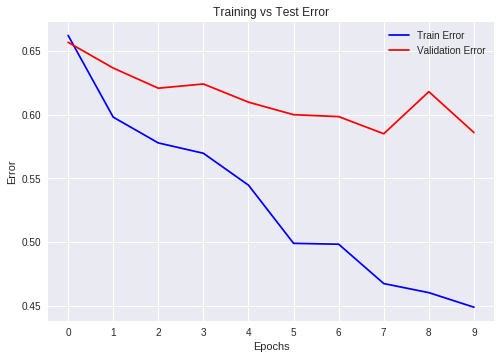

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 10, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_hiddenlayers2_augmented_withmasks.png")

In [0]:
predictions = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

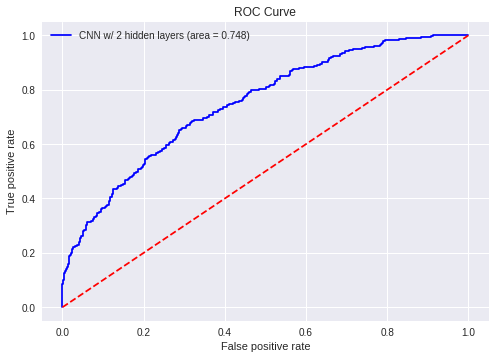

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 2 hidden layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_hiddenlayers2_augmented_withmasks_layers.png")

# Repeat with Cross-Validation

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
cv_loss1 = []
cv_accuracy1 = []
cv_auc1 = []

cv_loss2 = []
cv_accuracy2 = []
cv_auc2 = []

cv_loss3 = []
cv_accuracy3 = []
cv_auc3 = []

cv_loss4 = []
cv_accuracy4 = []
cv_auc4 = []

## Straightforward Fitting - Kernel

### 2x2 Kernel

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model1 = Sequential()
  model1.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model1.add(Dropout(0.3))
  model1.add(MaxPooling2D(pool_size=(3, 3)))
  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(num_classes, activation='sigmoid'))
  
  model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model1.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores1 = model1.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions1 = model1.predict(images_with_masks[test])
  fpr1, tpr1, thresholds1 = roc_curve(Y_test.ravel(), predictions1.ravel())
  model_auc1 = auc(fpr1, tpr1)
  
  print("Model 1 with 2x2 Kernel:")
  print("%s: %.2f" % (model1.metrics_names[0], scores1[0]))
  print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))
  
  cv_loss1.append(scores1[0])
  cv_accuracy1.append(scores1[1])
  cv_auc1.append(model_auc1)

Epoch 1/10
1212/1212 [==============================] - 213s 176ms/step - loss: 0.6212 - acc: 0.6683
Epoch 2/10
1212/1212 [==============================] - 209s 172ms/step - loss: 0.4480 - acc: 0.7896
Epoch 3/10
1212/1212 [==============================] - 208s 172ms/step - loss: 0.3400 - acc: 0.8614
Epoch 4/10
1212/1212 [==============================] - 209s 172ms/step - loss: 0.2607 - acc: 0.9175
Epoch 5/10
1212/1212 [==============================] - 208s 172ms/step - loss: 0.2115 - acc: 0.9373
Epoch 6/10
1212/1212 [==============================] - 209s 173ms/step - loss: 0.1589 - acc: 0.9649
Epoch 7/10
1212/1212 [==============================] - 209s 172ms/step - loss: 0.1283 - acc: 0.9724
Epoch 8/10
1212/1212 [==============================] - 209s 173ms/step - loss: 0.1004 - acc: 0.9810
Epoch 9/10
1212/1212 [==============================] - 208s 171ms/step - loss: 0.0800 - acc: 0.9872
Epoch 10/10
1212/1212 [==============================] - 208s 171ms/step - loss: 0.0683 - a

In [0]:
kernel_2x2_df = pd.DataFrame({"2x2 Kernel Loss":cv_loss1, "2x2 Kernel Accuracy":cv_accuracy1, "2x2 Kernel AUC":cv_auc1})

In [0]:
kernel_2x2_df.to_pickle("/content/gdrive/My Drive/Data/kernel_2x2")

### 3x3 Kernel

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model2 = Sequential()
  model2.add(Conv2D(64, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))
  model2.add(Dropout(0.3))
  model2.add(MaxPooling2D(pool_size=(3, 3)))
  model2.add(Dropout(0.3))
  model2.add(Flatten())
  model2.add(Dense(num_classes, activation='sigmoid'))
  
  model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model2.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores2 = model2.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions2 = model2.predict(images_with_masks[test])
  fpr2, tpr2, thresholds2 = roc_curve(Y_test.ravel(), predictions2.ravel())
  model_auc2 = auc(fpr2, tpr2)
  
  print("Model 1 with 3x3 Kernel:")
  print("%s: %.2f" % (model2.metrics_names[0], scores2[0]))
  print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))
  
  cv_loss2.append(scores2[0])
  cv_accuracy2.append(scores2[1])
  cv_auc2.append(model_auc2)

Epoch 1/10
1212/1212 [==============================] - 208s 171ms/step - loss: 0.5990 - acc: 0.6733
Epoch 2/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.4217 - acc: 0.7991
Epoch 3/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.3081 - acc: 0.8742
Epoch 4/10
1212/1212 [==============================] - 204s 169ms/step - loss: 0.2270 - acc: 0.9266
Epoch 5/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.1676 - acc: 0.9575
Epoch 6/10
1212/1212 [==============================] - 204s 169ms/step - loss: 0.1383 - acc: 0.9678
Epoch 7/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.1098 - acc: 0.9736
Epoch 8/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.0779 - acc: 0.9872
Epoch 9/10
1212/1212 [==============================] - 204s 169ms/step - loss: 0.0588 - acc: 0.9917
Epoch 10/10
1212/1212 [==============================] - 205s 169ms/step - loss: 0.0477 - a

In [0]:
kernel_3x3_df = pd.DataFrame({"3x3 Kernel Loss":cv_loss2, "3x3 Kernel Accuracy":cv_accuracy2, "3x3 Kernel AUC":cv_auc2})
kernel_3x3_df.to_pickle("/content/gdrive/My Drive/Data/kernel_3x3")

### 4x4 Kernel

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model3 = Sequential()
  model3.add(Conv2D(64, kernel_size=(4, 4),
                   activation='relu',
                   input_shape=input_shape))
  model3.add(Dropout(0.3))
  model3.add(MaxPooling2D(pool_size=(3, 3)))
  model3.add(Dropout(0.3))
  model3.add(Flatten())
  model3.add(Dense(num_classes, activation='sigmoid'))
  
  model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model3.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores3 = model3.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions3 = model3.predict(images_with_masks[test])
  fpr3, tpr3, thresholds3 = roc_curve(Y_test.ravel(), predictions3.ravel())
  model_auc3 = auc(fpr3, tpr3)
  
  print("Model 1 with 4x4 Kernel:")
  print("%s: %.2f" % (model3.metrics_names[0], scores3[0]))
  print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))
  
  cv_loss3.append(scores3[0])
  cv_accuracy3.append(scores3[1])
  cv_auc3.append(model_auc3)

Epoch 1/10
1212/1212 [==============================] - 218s 180ms/step - loss: 0.6028 - acc: 0.6568
Epoch 2/10
1212/1212 [==============================] - 214s 176ms/step - loss: 0.4085 - acc: 0.8243
Epoch 3/10
1212/1212 [==============================] - 214s 176ms/step - loss: 0.2775 - acc: 0.8965
Epoch 4/10
1212/1212 [==============================] - 215s 177ms/step - loss: 0.1876 - acc: 0.9352
Epoch 5/10
1212/1212 [==============================] - 215s 177ms/step - loss: 0.1313 - acc: 0.9633
Epoch 6/10
1212/1212 [==============================] - 213s 176ms/step - loss: 0.0922 - acc: 0.9736
Epoch 7/10
1212/1212 [==============================] - 214s 177ms/step - loss: 0.0637 - acc: 0.9876
Epoch 8/10
1212/1212 [==============================] - 214s 176ms/step - loss: 0.0487 - acc: 0.9959
Epoch 9/10
1212/1212 [==============================] - 214s 176ms/step - loss: 0.0355 - acc: 0.9975
Epoch 10/10
1212/1212 [==============================] - 215s 177ms/step - loss: 0.0274 - a

In [0]:
kernel_4x4_df = pd.DataFrame({"4x4 Kernel Loss":cv_loss3, "4x4 Kernel Accuracy":cv_accuracy3, "4x4 Kernel AUC":cv_auc3})
kernel_4x4_df.to_pickle("/content/gdrive/My Drive/Data/kernel_4x4")

### 5x5 Kernel Size

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model4 = Sequential()
  model4.add(Conv2D(64, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape))
  model4.add(Dropout(0.3))
  model4.add(MaxPooling2D(pool_size=(3, 3)))
  model4.add(Dropout(0.3))
  model4.add(Flatten())
  model4.add(Dense(num_classes, activation='sigmoid'))
  
  model4.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model4.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores4 = model4.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions4 = model4.predict(images_with_masks[test])
  fpr4, tpr4, thresholds4 = roc_curve(Y_test.ravel(), predictions4.ravel())
  model_auc4 = auc(fpr4, tpr4)
  
  print("Model 4 with 5x5 Kernel:")
  print("%s: %.2f" % (model4.metrics_names[0], scores4[0]))
  print("%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))
  
  cv_loss4.append(scores4[0])
  cv_accuracy4.append(scores4[1])
  cv_auc4.append(model_auc4)

Epoch 1/10
1212/1212 [==============================] - 14s 11ms/step - loss: 0.6440 - acc: 0.6258
Epoch 2/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.4446 - acc: 0.7851
Epoch 3/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.3180 - acc: 0.8614
Epoch 4/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.2188 - acc: 0.9245
Epoch 5/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.1485 - acc: 0.9513
Epoch 6/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.1059 - acc: 0.9699
Epoch 7/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.0823 - acc: 0.9831
Epoch 8/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.0567 - acc: 0.9901
Epoch 9/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.0402 - acc: 0.9942
Epoch 10/10
1212/1212 [==============================] - 9s 8ms/step - loss: 0.0339 - acc: 0.9950
Model 4 with 5x5 Kernel:
lo

In [0]:
kernel_5x5_df = pd.DataFrame({"5x5 Kernel Loss":cv_loss4, "5x5 Kernel Accuracy":cv_accuracy4, "5x5 Kernel AUC":cv_auc4})
kernel_5x5_df.to_pickle("/content/gdrive/My Drive/Data/kernel_5x5")

### Comparing Kernel Sizes

In [0]:
kernel_2x2_df = pd.read_pickle(path = "/content/gdrive/My Drive/Data/kernel_2x2")
kernel_3x3_df = pd.read_pickle(path = "/content/gdrive/My Drive/Data/kernel_3x3")
kernel_4x4_df = pd.read_pickle(path = "/content/gdrive/My Drive/Data/kernel_4x4")
kernel_5x5_df = pd.read_pickle(path = "/content/gdrive/My Drive/Data/kernel_5x5")

In [0]:
kernel_df = pd.concat([kernel_2x2_df, kernel_3x3_df, kernel_4x4_df, kernel_5x5_df], axis = 1)

In [0]:
kernel_df.mean(axis = 0)

2x2 Kernel AUC         0.873856
2x2 Kernel Accuracy    0.782651
2x2 Kernel Loss        0.464973
3x3 Kernel AUC         0.869229
3x3 Kernel Accuracy    0.787060
3x3 Kernel Loss        0.498900
4x4 Kernel AUC         0.863886
4x4 Kernel Accuracy    0.784048
4x4 Kernel Loss        0.553773
5x5 Kernel AUC         0.861297
5x5 Kernel Accuracy    0.780235
5x5 Kernel Loss        0.531365
dtype: float64

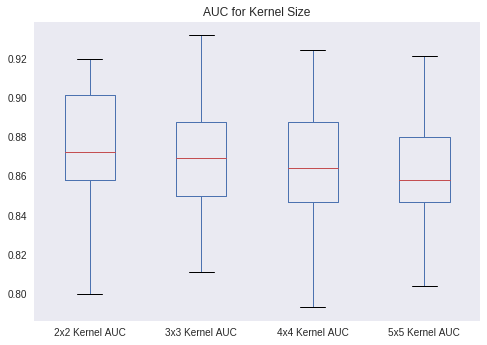

In [0]:
fig = plt.figure();
kernel_df.boxplot(column = ["2x2 Kernel AUC", "3x3 Kernel AUC", "4x4 Kernel AUC", "5x5 Kernel AUC"], grid = False);
plt.title("AUC for Kernel Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/kernel_AUC_nonaugmented")

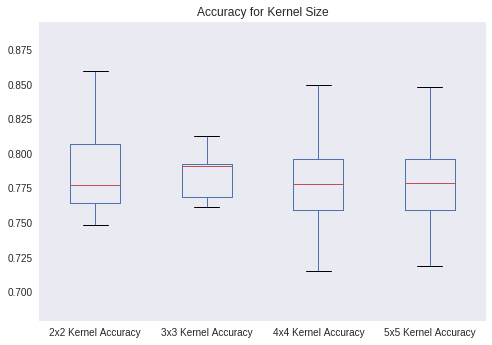

In [0]:
fig = plt.figure();
kernel_df.boxplot(column = ["2x2 Kernel Accuracy", "3x3 Kernel Accuracy", "4x4 Kernel Accuracy", "5x5 Kernel Accuracy"], grid = False);
plt.title("Accuracy for Kernel Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/kernel_accuracy_nonaugmented")

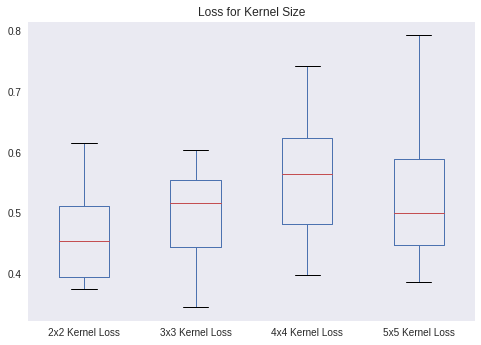

In [0]:
fig = plt.figure();
kernel_df.boxplot(column = ["2x2 Kernel Loss", "3x3 Kernel Loss", "4x4 Kernel Loss", "5x5 Kernel Loss"], grid = False);
plt.title("Loss for Kernel Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/kernel_loss_nonaugmented")

## Straightforward Fitting - Pooling

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
cv_loss1 = []
cv_accuracy1 = []
cv_auc1 = []

cv_loss2 = []
cv_accuracy2 = []
cv_auc2 = []

cv_loss3 = []
cv_accuracy3 = []
cv_auc3 = []

cv_loss4 = []
cv_accuracy4 = []
cv_auc4 = []

### 2x2 Pooling

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model1 = Sequential()
  model1.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model1.add(Dropout(0.3))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(num_classes, activation='sigmoid'))
  
  model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model1.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores1 = model1.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions1 = model1.predict(images_with_masks[test])
  fpr1, tpr1, thresholds1 = roc_curve(Y_test.ravel(), predictions1.ravel())
  model_auc1 = auc(fpr1, tpr1)
  
  print("Model 1 with 2x2 Pooling:")
  print("%s: %.2f" % (model1.metrics_names[0], scores1[0]))
  print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))
  
  cv_loss1.append(scores1[0])
  cv_accuracy1.append(scores1[1])
  cv_auc1.append(model_auc1)

Epoch 1/10
1212/1212 [==============================] - 206s 170ms/step - loss: 0.6645 - acc: 0.6275
Epoch 2/10
1212/1212 [==============================] - 199s 164ms/step - loss: 0.4220 - acc: 0.8003
Epoch 3/10
1212/1212 [==============================] - 199s 164ms/step - loss: 0.2993 - acc: 0.8932
Epoch 4/10
1212/1212 [==============================] - 199s 164ms/step - loss: 0.2189 - acc: 0.9381
Epoch 5/10
1212/1212 [==============================] - 196s 162ms/step - loss: 0.1458 - acc: 0.9719
Epoch 6/10
1212/1212 [==============================] - 201s 165ms/step - loss: 0.1021 - acc: 0.9893
Epoch 7/10
1212/1212 [==============================] - 200s 165ms/step - loss: 0.0774 - acc: 0.9905
Epoch 8/10
1212/1212 [==============================] - 199s 164ms/step - loss: 0.0545 - acc: 0.9971
Epoch 9/10
1212/1212 [==============================] - 197s 163ms/step - loss: 0.0385 - acc: 0.9992
Epoch 10/10
1212/1212 [==============================] - 194s 160ms/step - loss: 0.0290 - a

In [0]:
pooling_2x2_df = pd.DataFrame({"2x2 Pooling Loss":cv_loss1, "2x2 Pooling Accuracy":cv_accuracy1, "2x2 Pooling AUC":cv_auc1})
pooling_2x2_df.to_pickle("/content/gdrive/My Drive/Data/pooling_2x2")

### 3x3 Pooling

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model2 = Sequential()
  model2.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model2.add(Dropout(0.3))
  model2.add(MaxPooling2D(pool_size=(3, 3)))
  model2.add(Dropout(0.3))
  model2.add(Flatten())
  model2.add(Dense(num_classes, activation='sigmoid'))
  
  model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model2.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores2 = model2.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions2 = model2.predict(images_with_masks[test])
  fpr2, tpr2, thresholds2 = roc_curve(Y_test.ravel(), predictions2.ravel())
  model_auc2 = auc(fpr2, tpr2)
  
  print("Model 2 with 3x3 Pooling:")
  print("%s: %.2f" % (model2.metrics_names[0], scores2[0]))
  print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))
  
  cv_loss2.append(scores2[0])
  cv_accuracy2.append(scores2[1])
  cv_auc2.append(model_auc2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1212/1212 [==============================] - 13s 11ms/step - loss: 0.5928 - acc: 0.6506
Epoch 2/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.4143 - acc: 0.8152
Epoch 3/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.3163 - acc: 0.8795
Epoch 4/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.2485 - acc: 0.9249
Epoch 5/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.1958 - acc: 0.9517
Epoch 6/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.1481 - acc: 0.9592
Epoch 7/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.1269 - acc: 0.9707
Epoch 8/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.1004 -

In [0]:
pooling_3x3_df = pd.DataFrame({"3x3 Pooling Loss":cv_loss2, "3x3 Pooling Accuracy":cv_accuracy2, "3x3 Pooling AUC":cv_auc2})
pooling_3x3_df.to_pickle("/content/gdrive/My Drive/Data/pooling_3x3")

### 4x4 Pooling

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model3 = Sequential()
  model3.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model3.add(Dropout(0.3))
  model3.add(MaxPooling2D(pool_size=(4, 4)))
  model3.add(Dropout(0.3))
  model3.add(Flatten())
  model3.add(Dense(num_classes, activation='sigmoid'))
  
  model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model3.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores3 = model3.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions3 = model3.predict(images_with_masks[test])
  fpr3, tpr3, thresholds3 = roc_curve(Y_test.ravel(), predictions3.ravel())
  model_auc3 = auc(fpr3, tpr3)
  
  print("Model 3 with 4x4 Pooling:")
  print("%s: %.2f" % (model3.metrics_names[0], scores3[0]))
  print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))
  
  cv_loss3.append(scores3[0])
  cv_accuracy3.append(scores3[1])
  cv_auc3.append(model_auc3)

Epoch 1/10
1212/1212 [==============================] - 9s 7ms/step - loss: 0.6010 - acc: 0.6460
Epoch 2/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.4515 - acc: 0.7781
Epoch 3/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.3772 - acc: 0.8449
Epoch 4/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.3020 - acc: 0.8849
Epoch 5/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.2561 - acc: 0.9047
Epoch 6/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.2092 - acc: 0.9323
Epoch 7/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1726 - acc: 0.9505
Epoch 8/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1445 - acc: 0.9616
Epoch 9/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1198 - acc: 0.9740
Epoch 10/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1041 - acc: 0.9790
Model 3 with 4x4 Pooling:
los

In [0]:
pooling_4x4_df = pd.DataFrame({"4x4 Pooling Loss":cv_loss3, "4x4 Pooling Accuracy":cv_accuracy3, "4x4 Pooling AUC":cv_auc3})
pooling_4x4_df.to_pickle("/content/gdrive/My Drive/Data/pooling_4x4")

### 5x5 Pooling

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model4 = Sequential()
  model4.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model4.add(Dropout(0.3))
  model4.add(MaxPooling2D(pool_size=(5, 5)))
  model4.add(Dropout(0.3))
  model4.add(Flatten())
  model4.add(Dense(num_classes, activation='sigmoid'))
  
  model4.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model4.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores4 = model4.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions4 = model4.predict(images_with_masks[test])
  fpr4, tpr4, thresholds4 = roc_curve(Y_test.ravel(), predictions4.ravel())
  model_auc4 = auc(fpr4, tpr4)
  
  print("Model 4 with 5x5 Pooling:")
  print("%s: %.2f" % (model4.metrics_names[0], scores4[0]))
  print("%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))
  
  cv_loss4.append(scores4[0])
  cv_accuracy4.append(scores4[1])
  cv_auc4.append(model_auc4)

Epoch 1/10
1212/1212 [==============================] - 10s 8ms/step - loss: 0.6033 - acc: 0.6291
Epoch 2/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.4887 - acc: 0.7541
Epoch 3/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.4271 - acc: 0.7937
Epoch 4/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.3634 - acc: 0.8420
Epoch 5/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.3172 - acc: 0.8696
Epoch 6/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.2780 - acc: 0.8936
Epoch 7/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.2457 - acc: 0.9097
Epoch 8/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.2184 - acc: 0.9208
Epoch 9/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1958 - acc: 0.9336
Epoch 10/10
1212/1212 [==============================] - 8s 7ms/step - loss: 0.1723 - acc: 0.9435
Model 4 with 5x5 Pooling:
lo

In [0]:
pooling_5x5_df = pd.DataFrame({"5x5 Pooling Loss":cv_loss4, "5x5 Pooling Accuracy":cv_accuracy4, "5x5 Pooling AUC":cv_auc4})
pooling_5x5_df.to_pickle("/content/gdrive/My Drive/Data/pooling_5x5")

### Comparing Pooling Sizes

In [0]:
pooling_2x2_df = pd.read_pickle("/content/gdrive/My Drive/Data/pooling_2x2")
pooling_3x3_df = pd.read_pickle("/content/gdrive/My Drive/Data/pooling_3x3")
pooling_4x4_df = pd.read_pickle("/content/gdrive/My Drive/Data/pooling_4x4")
pooling_5x5_df = pd.read_pickle("/content/gdrive/My Drive/Data/pooling_5x5")

In [0]:
pooling_df = pd.concat([pooling_2x2_df, pooling_3x3_df, pooling_4x4_df, pooling_5x5_df], axis=1)

In [0]:
pooling_df.mean(axis = 0)

2x2 Pooling AUC         0.891076
2x2 Pooling Accuracy    0.806341
2x2 Pooling Loss        0.438001
3x3 Pooling AUC         0.873355
3x3 Pooling Accuracy    0.788242
3x3 Pooling Loss        0.460364
4x4 Pooling AUC         0.868407
4x4 Pooling Accuracy    0.787447
4x4 Pooling Loss        0.463834
5x5 Pooling AUC         0.862224
5x5 Pooling Accuracy    0.777839
5x5 Pooling Loss        0.461168
dtype: float64

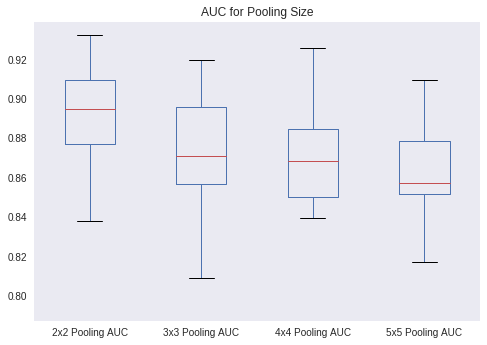

In [0]:
fig = plt.figure();
pooling_df.boxplot(column = ["2x2 Pooling AUC", "3x3 Pooling AUC", "4x4 Pooling AUC", "5x5 Pooling AUC"], grid = False);
plt.title("AUC for Pooling Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/pooling_AUC_nonaugmented")

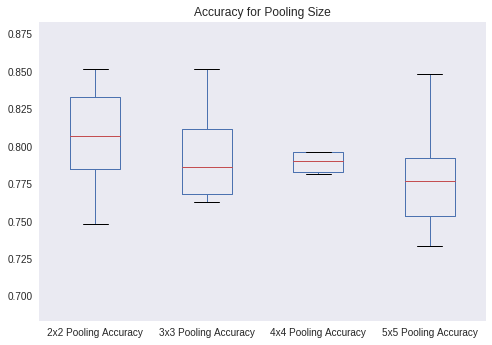

In [0]:
fig = plt.figure();
pooling_df.boxplot(column = ["2x2 Pooling Accuracy", "3x3 Pooling Accuracy", "4x4 Pooling Accuracy", "5x5 Pooling Accuracy"], grid = False);
plt.title("Accuracy for Pooling Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/pooling_accuracy_nonaugmented")

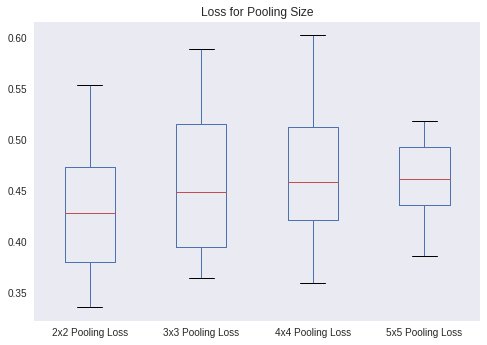

In [0]:
fig = plt.figure();
pooling_df.boxplot(column = ["2x2 Pooling Loss", "3x3 Pooling Loss", "4x4 Pooling Loss", "5x5 Pooling Loss"], grid = False);
plt.title("Loss for Pooling Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/pooling_loss_nonaugmented")

## Straightforward Fitting - Stride

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
cv_loss1 = []
cv_accuracy1 = []
cv_auc1 = []

cv_loss2 = []
cv_accuracy2 = []
cv_auc2 = []

cv_loss3 = []
cv_accuracy3 = []
cv_auc3 = []

cv_loss4 = []
cv_accuracy4 = []
cv_auc4 = []

### 2x2 Stride

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model1 = Sequential()
  model1.add(Conv2D(64, kernel_size=(2, 2), 
                   strides=(2,2),
                   activation='relu',
                   input_shape=input_shape))
  model1.add(Dropout(0.3))
  model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(num_classes, activation='sigmoid'))
  
  model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model1.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)
  
  scores1 = model1.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions1 = model1.predict(images_with_masks[test])
  fpr1, tpr1, thresholds1 = roc_curve(Y_test.ravel(), predictions1.ravel())
  model_auc1 = auc(fpr1, tpr1)
  
  print("Model 1 with 2x2 Stride:")
  print("%s: %.2f" % (model1.metrics_names[0], scores1[0]))
  print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))
  
  cv_loss1.append(scores1[0])
  cv_accuracy1.append(scores1[1])
  cv_auc1.append(model_auc1)

Model 1 with Stride Length of 2:
loss: 0.46
acc: 75.74%
Model 1 with Stride Length of 2:
loss: 0.52
acc: 73.33%
Model 1 with Stride Length of 2:
loss: 0.47
acc: 76.67%
Model 1 with Stride Length of 2:
loss: 0.55
acc: 73.33%
Model 1 with Stride Length of 2:
loss: 0.42
acc: 80.37%
Model 1 with Stride Length of 2:
loss: 0.40
acc: 81.11%
Model 1 with Stride Length of 2:
loss: 0.51
acc: 74.81%
Model 1 with Stride Length of 2:
loss: 0.53
acc: 73.13%
Model 1 with Stride Length of 2:
loss: 0.40
acc: 78.73%
Model 1 with Stride Length of 2:
loss: 0.43
acc: 77.61%


In [0]:
stride_2x2_df = pd.DataFrame({"2x2 Stride Loss":cv_loss1, "2x2 Stride Accuracy":cv_accuracy1, "2x2 Stride AUC":cv_auc1})
stride_2x2_df.to_pickle("/content/gdrive/My Drive/Data/stride_2x2")

### 3x3 Stride

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model2 = Sequential()
  model2.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model2.add(Dropout(0.3))
  model2.add(MaxPooling2D(pool_size=(2, 2), strides=(3, 3)))
  model2.add(Dropout(0.3))
  model2.add(Flatten())
  model2.add(Dense(num_classes, activation='sigmoid'))
  
  model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model2.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)
  
  scores2 = model2.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions2 = model2.predict(images_with_masks[test])
  fpr2, tpr2, thresholds2 = roc_curve(Y_test.ravel(), predictions2.ravel())
  model_auc2 = auc(fpr2, tpr2)
  
  print("Model 2 with 3x3 Stride:")
  print("%s: %.2f" % (model2.metrics_names[0], scores2[0]))
  print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))
  
  cv_loss2.append(scores2[0])
  cv_accuracy2.append(scores2[1])
  cv_auc2.append(model_auc2)

Epoch 1/10
1212/1212 [==============================] - 20s 17ms/step - loss: 0.6390 - acc: 0.6064
Epoch 2/10
1212/1212 [==============================] - 20s 16ms/step - loss: 0.5643 - acc: 0.6815
Epoch 3/10
1212/1212 [==============================] - 20s 16ms/step - loss: 0.5233 - acc: 0.7141
Epoch 4/10
1212/1212 [==============================] - 20s 16ms/step - loss: 0.4898 - acc: 0.7479
Epoch 5/10
1212/1212 [==============================] - 20s 16ms/step - loss: 0.4639 - acc: 0.7686
Epoch 6/10
1212/1212 [==============================] - 20s 16ms/step - loss: 0.4402 - acc: 0.8061
Epoch 7/10
1212/1212 [==============================] - 19s 16ms/step - loss: 0.4243 - acc: 0.8028
Epoch 8/10
1212/1212 [==============================] - 19s 16ms/step - loss: 0.4070 - acc: 0.8189
Epoch 9/10
1212/1212 [==============================] - 19s 16ms/step - loss: 0.3821 - acc: 0.8370
Epoch 10/10
1212/1212 [==============================] - 19s 16ms/step - loss: 0.3717 - acc: 0.8403
Model 2 w

In [0]:
stride_3x3_df = pd.DataFrame({"3x3 Stride Loss":cv_loss2, "3x3 Stride Accuracy":cv_accuracy2, "3x3 Stride AUC":cv_auc2})
stride_3x3_df.to_pickle("/content/gdrive/My Drive/Data/stride_3x3")

### 4x4 Stride

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model3 = Sequential()
  model3.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(4, 4),
                   activation='relu',
                   input_shape=input_shape))
  model3.add(Dropout(0.3))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(4, 4)))
  model3.add(Dropout(0.3))
  model3.add(Flatten())
  model3.add(Dense(num_classes, activation='sigmoid'))
  
  model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model3.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores3 = model3.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions3 = model3.predict(images_with_masks[test])
  fpr3, tpr3, thresholds3 = roc_curve(Y_test.ravel(), predictions3.ravel())
  model_auc3 = auc(fpr3, tpr3)
  
  print("Model 3 with 4x4 Stride:")
  print("%s: %.2f" % (model3.metrics_names[0], scores3[0]))
  print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))
  
  cv_loss3.append(scores3[0])
  cv_accuracy3.append(scores3[1])
  cv_auc3.append(model_auc3)

Epoch 1/10
1212/1212 [==============================] - 12s 10ms/step - loss: 0.6627 - acc: 0.6093
Epoch 2/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5924 - acc: 0.6762
Epoch 3/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5623 - acc: 0.6807
Epoch 4/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5389 - acc: 0.7083
Epoch 5/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5209 - acc: 0.7224
Epoch 6/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5110 - acc: 0.7252
Epoch 7/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.5059 - acc: 0.7343
Epoch 8/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.4939 - acc: 0.7372
Epoch 9/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.4966 - acc: 0.7504
Epoch 10/10
1212/1212 [==============================] - 11s 9ms/step - loss: 0.4887 - acc: 0.7434
Model 3 with 4x4 S

In [0]:
stride_4x4_df = pd.DataFrame({"4x4 Stride Loss":cv_loss3, "4x4 Stride Accuracy":cv_accuracy3, "4x4 Stride AUC":cv_auc3})
stride_4x4_df.to_pickle("/content/gdrive/My Drive/Data/stride_4x4")

### 5x5 Stride

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model4 = Sequential()
  model4.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(5, 5),
                   activation='relu',
                   input_shape=input_shape))
  model4.add(Dropout(0.3))
  model4.add(MaxPooling2D(pool_size=(2, 2), strides=(5, 5)))
  model4.add(Dropout(0.3))
  model4.add(Flatten())
  model4.add(Dense(num_classes, activation='sigmoid'))
  
  model4.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model4.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores4 = model4.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions4 = model4.predict(images_with_masks[test])
  fpr4, tpr4, thresholds4 = roc_curve(Y_test.ravel(), predictions4.ravel())
  model_auc4 = auc(fpr4, tpr4)
  
  print("Model 4 with 5x5 Stride:")
  print("%s: %.2f" % (model4.metrics_names[0], scores4[0]))
  print("%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))
  
  cv_loss4.append(scores4[0])
  cv_accuracy4.append(scores4[1])
  cv_auc4.append(model_auc4)

Epoch 1/10
1212/1212 [==============================] - 10s 8ms/step - loss: 0.6729 - acc: 0.6093
Epoch 2/10
1212/1212 [==============================] - 7s 6ms/step - loss: 0.6258 - acc: 0.6526
Epoch 3/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5933 - acc: 0.6663
Epoch 4/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5755 - acc: 0.6658
Epoch 5/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5683 - acc: 0.6671
Epoch 6/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5618 - acc: 0.6745
Epoch 7/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5603 - acc: 0.6733
Epoch 8/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5546 - acc: 0.6836
Epoch 9/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5531 - acc: 0.6898
Epoch 10/10
1212/1212 [==============================] - 6s 5ms/step - loss: 0.5510 - acc: 0.6947
Model 4 with 5x5 Stride:
los

In [0]:
stride_5x5_df = pd.DataFrame({"5x5 Stride Loss":cv_loss4, "5x5 Stride Accuracy":cv_accuracy4, "5x5 Stride AUC":cv_auc4})
stride_5x5_df.to_pickle("/content/gdrive/My Drive/Data/stride_5x5")

### Comparing Stride Sizes

In [0]:
stride_2x2_df = pd.read_pickle("/content/gdrive/My Drive/Data/stride_2x2")
stride_3x3_df = pd.read_pickle("/content/gdrive/My Drive/Data/stride_3x3")
stride_4x4_df = pd.read_pickle("/content/gdrive/My Drive/Data/stride_4x4")
stride_5x5_df = pd.read_pickle("/content/gdrive/My Drive/Data/stride_5x5")

In [0]:
stride_df = pd.concat([stride_2x2_df, stride_3x3_df, stride_4x4_df, stride_5x5_df], axis = 1)

In [0]:
stride_df.mean(axis = 0)

2x2 Stride AUC         0.861477
2x2 Stride Accuracy    0.764843
2x2 Stride Loss        0.468569
3x3 Stride AUC         0.830798
3x3 Stride Accuracy    0.748157
3x3 Stride Loss        0.500810
4x4 Stride AUC         0.795552
4x4 Stride Accuracy    0.705464
4x4 Stride Loss        0.537614
5x5 Stride AUC         0.755265
5x5 Stride Accuracy    0.676566
5x5 Stride Loss        0.581057
dtype: float64

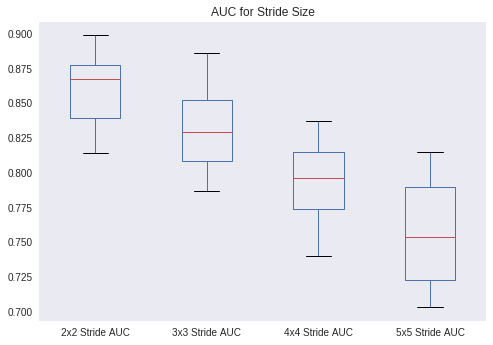

In [0]:
fig = plt.figure();
stride_df.boxplot(column = ["2x2 Stride AUC", "3x3 Stride AUC", "4x4 Stride AUC", "5x5 Stride AUC"], grid = False);
plt.title("AUC for Stride Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/stride_AUC_nonaugmented")

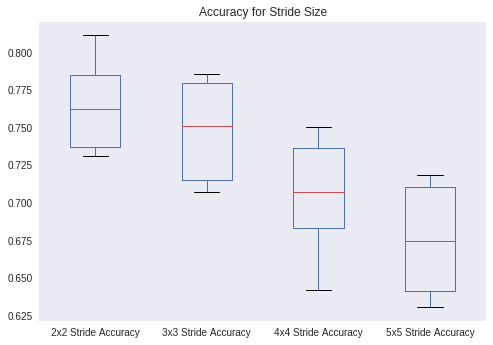

In [0]:
fig = plt.figure();
stride_df.boxplot(column = ["2x2 Stride Accuracy", "3x3 Stride Accuracy", "4x4 Stride Accuracy", "5x5 Stride Accuracy"], grid = False);
plt.title("Accuracy for Stride Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/stride_accuracy_nonaugmented")

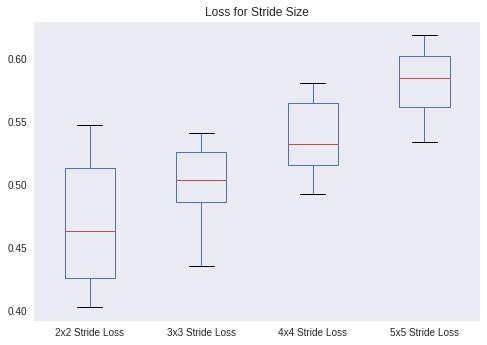

In [0]:
fig = plt.figure();
stride_df.boxplot(column = ["2x2 Stride Loss", "3x3 Stride Loss", "4x4 Stride Loss", "5x5 Stride Loss"], grid = False);
plt.title("Loss for Stride Size");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/stride_loss_nonaugmented")

## Straightforward Fitting - Number of Layers

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)

epochs = 10

cv_loss1 = []
cv_accuracy1 = []
cv_auc1 = []

cv_loss2 = []
cv_accuracy2 = []
cv_auc2 = []

cv_loss3 = []
cv_accuracy3 = []
cv_auc3 = []

cv_loss4 = []
cv_accuracy4 = []
cv_auc4 = []

### Shallow Model

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model1 = Sequential()
  model1.add(Conv2D(64, kernel_size=(2, 2), 
                   strides=(2,2),
                   activation='relu',
                   input_shape=input_shape))
  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(num_classes, activation='sigmoid'))
  
  model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model1.fit(images_with_masks[train], Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
  
  scores1 = model1.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions1 = model1.predict(images_with_masks[test])
  fpr1, tpr1, thresholds1 = roc_curve(Y_test.ravel(), predictions1.ravel())
  model_auc1 = auc(fpr1, tpr1)
  
  print("Model 1 with 0 Hidden Layers:")
  print("%s: %.2f" % (model1.metrics_names[0], scores1[0]))
  print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))
  
  cv_loss1.append(scores1[0])
  cv_accuracy1.append(scores1[1])
  cv_auc1.append(model_auc1)

Epoch 1/10
1212/1212 [==============================] - 62s 51ms/step - loss: 0.5995 - acc: 0.6427
Epoch 2/10
1212/1212 [==============================] - 60s 49ms/step - loss: 0.4229 - acc: 0.8053
Epoch 3/10
1212/1212 [==============================] - 59s 49ms/step - loss: 0.3271 - acc: 0.8700
Epoch 4/10
1212/1212 [==============================] - 59s 48ms/step - loss: 0.2479 - acc: 0.9286
Epoch 5/10
1212/1212 [==============================] - 59s 49ms/step - loss: 0.1920 - acc: 0.9559
Epoch 6/10
1212/1212 [==============================] - 59s 49ms/step - loss: 0.1466 - acc: 0.9715
Epoch 7/10
1212/1212 [==============================] - 60s 49ms/step - loss: 0.1184 - acc: 0.9802
Epoch 8/10
1212/1212 [==============================] - 60s 49ms/step - loss: 0.0885 - acc: 0.9884
Epoch 9/10
1212/1212 [==============================] - 60s 49ms/step - loss: 0.0830 - acc: 0.9872
Epoch 10/10
1212/1212 [==============================] - 60s 50ms/step - loss: 0.0603 - acc: 0.9983
Model 1 w

In [0]:
layers_0_df = pd.DataFrame({"0 Layer Loss":cv_loss1, "0 Layer Accuracy":cv_accuracy1, "0 Layer AUC":cv_auc1})
layers_0_df.to_pickle("/content/gdrive/My Drive/Data/layers_0")

### Add Convolution Layer

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model2 = Sequential()
  model2.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2,2),
                   activation='relu',
                   input_shape=input_shape))
  model2.add(Dropout(0.3))
  model2.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2,2),
                   activation='relu'))
  model2.add(Dropout(0.3))
  model2.add(Flatten())
  model2.add(Dense(num_classes, activation='sigmoid'))
  
  model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model2.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  
  scores2 = model2.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions2 = model2.predict(images_with_masks[test])
  fpr2, tpr2, thresholds2 = roc_curve(Y_test.ravel(), predictions2.ravel())
  model_auc2 = auc(fpr2, tpr2)
  
  print("Model 2 with Extra Convolutional Layer:")
  print("%s: %.2f" % (model2.metrics_names[0], scores2[0]))
  print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))
  
  cv_loss2.append(scores2[0])
  cv_accuracy2.append(scores2[1])
  cv_auc2.append(model_auc2)

Model 2 with Extra Convolutional Layer:
loss: 0.49
acc: 78.68%
Model 2 with Extra Convolutional Layer:
loss: 0.63
acc: 75.19%
Model 2 with Extra Convolutional Layer:
loss: 0.59
acc: 75.93%
Model 2 with Extra Convolutional Layer:
loss: 0.58
acc: 75.56%
Model 2 with Extra Convolutional Layer:
loss: 0.51
acc: 82.96%
Model 2 with Extra Convolutional Layer:
loss: 0.50
acc: 83.33%
Model 2 with Extra Convolutional Layer:
loss: 0.73
acc: 76.30%
Model 2 with Extra Convolutional Layer:
loss: 0.55
acc: 76.87%
Model 2 with Extra Convolutional Layer:
loss: 0.38
acc: 83.96%
Model 2 with Extra Convolutional Layer:
loss: 0.52
acc: 78.36%


In [0]:
layers_1_df = pd.DataFrame({"1 Layer Loss":cv_loss2, "1 Layer Accuracy":cv_accuracy2, "1 Layer AUC":cv_auc2})
layers_1_df.to_pickle("/content/gdrive/My Drive/Data/layers_1")

### Add Pooling Layer

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model3 = Sequential()
  model3.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model3.add(Dropout(0.3))
  model3.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2, 2),
                   activation='relu'))
  model3.add(Dropout(0.3))
  model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model3.add(Dropout(0.3))
  model3.add(Flatten())
  model3.add(Dense(num_classes, activation='sigmoid'))
  
  model3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model3.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)
  
  scores3 = model3.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions3 = model3.predict(images_with_masks[test])
  fpr3, tpr3, thresholds3 = roc_curve(Y_test.ravel(), predictions3.ravel())
  model_auc3 = auc(fpr3, tpr3)
  
  print("Model 3 with Added Pooling Layer:")
  print("%s: %.2f" % (model3.metrics_names[0], scores3[0]))
  print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))
  
  cv_loss3.append(scores3[0])
  cv_accuracy3.append(scores3[1])
  cv_auc3.append(model_auc3)

Model 3 with Added Pooling Layer:
loss: 0.44
acc: 79.78%
Model 3 with Added Pooling Layer:
loss: 0.50
acc: 73.70%
Model 3 with Added Pooling Layer:
loss: 0.41
acc: 78.15%
Model 3 with Added Pooling Layer:
loss: 0.50
acc: 71.11%
Model 3 with Added Pooling Layer:
loss: 0.45
acc: 74.07%
Model 3 with Added Pooling Layer:
loss: 0.41
acc: 79.63%
Model 3 with Added Pooling Layer:
loss: 0.50
acc: 75.56%
Model 3 with Added Pooling Layer:
loss: 0.51
acc: 72.39%
Model 3 with Added Pooling Layer:
loss: 0.46
acc: 73.88%
Model 3 with Added Pooling Layer:
loss: 0.44
acc: 75.00%


In [0]:
layers_2_df = pd.DataFrame({"2 Layer Loss":cv_loss3, "2 Layer Accuracy":cv_accuracy3, "2 Layer AUC":cv_auc3})
layers_2_df.to_pickle("/content/gdrive/My Drive/Data/layers_2")

### Add another Pooling Layer

In [0]:
for train, test in kfold.split(images_with_masks, labels):
  
  Y_train = keras.utils.to_categorical(labels[train], num_classes)
  Y_test = keras.utils.to_categorical(labels[test], num_classes)
  
  model4 = Sequential()
  model4.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2, 2),
                   activation='relu',
                   input_shape=input_shape))
  model4.add(Dropout(0.3))
  model4.add(Conv2D(64, kernel_size=(2, 2),
                   strides=(2, 2),
                   activation='relu'))
  model4.add(Dropout(0.3))
  model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model4.add(Dropout(0.3))
  model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model4.add(Flatten())
  model4.add(Dense(num_classes, activation='sigmoid'))
  
  model4.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
  
  model4.fit(images_with_masks[train], Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)
  
  scores4 = model4.evaluate(images_with_masks[test], Y_test, verbose=0)
  predictions4 = model4.predict(images_with_masks[test])
  fpr4, tpr4, thresholds4 = roc_curve(Y_test.ravel(), predictions4.ravel())
  model_auc4 = auc(fpr4, tpr4)
  
  print("Model 4 with Added Pooling Layer:")
  print("%s: %.2f" % (model4.metrics_names[0], scores4[0]))
  print("%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))
  
  cv_loss4.append(scores4[0])
  cv_accuracy4.append(scores4[1])
  cv_auc4.append(model_auc4)

Model 4 with Added Pooling Layer:
loss: 0.53
acc: 70.96%
Model 4 with Added Pooling Layer:
loss: 0.52
acc: 72.59%
Model 4 with Added Pooling Layer:
loss: 0.49
acc: 80.00%
Model 4 with Added Pooling Layer:
loss: 0.54
acc: 72.59%
Model 4 with Added Pooling Layer:
loss: 0.48
acc: 74.07%
Model 4 with Added Pooling Layer:
loss: 0.49
acc: 75.19%
Model 4 with Added Pooling Layer:
loss: 0.53
acc: 76.67%
Model 4 with Added Pooling Layer:
loss: 0.56
acc: 71.64%
Model 4 with Added Pooling Layer:
loss: 0.52
acc: 76.12%
Model 4 with Added Pooling Layer:
loss: 0.54
acc: 69.40%


In [0]:
layers_3_df = pd.DataFrame({"3 Layer Loss":cv_loss4, "3 Layer Accuracy":cv_accuracy4, "3 Layer AUC":cv_auc4})
layers_3_df.to_pickle("/content/gdrive/My Drive/Data/layers_3")

In [0]:
layers_0_df = pd.read_pickle("/content/gdrive/My Drive/Data/layers_0")
layers_1_df = pd.read_pickle("/content/gdrive/My Drive/Data/layers_1")
layers_2_df = pd.read_pickle("/content/gdrive/My Drive/Data/layers_2")
layers_3_df = pd.read_pickle("/content/gdrive/My Drive/Data/layers_3")

In [0]:
layers_df = pd.concat([layers_0_df, layers_1_df, layers_2_df, layers_3_df], axis = 1)

In [0]:
layers_df.mean(axis = 0)

0 Layer AUC         0.885411
0 Layer Accuracy    0.803365
0 Layer Loss        0.478106
1 Layer AUC         0.874964
1 Layer Accuracy    0.787115
1 Layer Loss        0.548844
2 Layer AUC         0.855245
2 Layer Accuracy    0.753270
2 Layer Loss        0.462719
3 Layer AUC         0.821756
3 Layer Accuracy    0.739231
3 Layer Loss        0.519294
dtype: float64

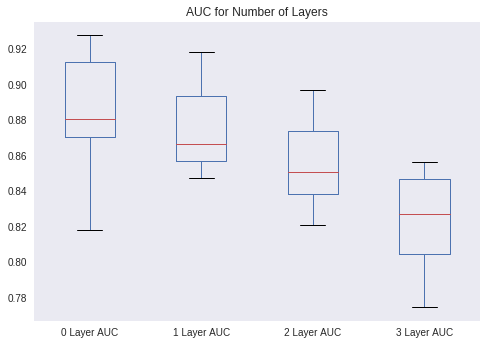

In [0]:
fig = plt.figure();
layers_df.boxplot(column = ["0 Layer AUC", "1 Layer AUC", "2 Layer AUC", "3 Layer AUC"], grid = False);
plt.title("AUC for Number of Layers");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/layer_AUC_nonaugmented")

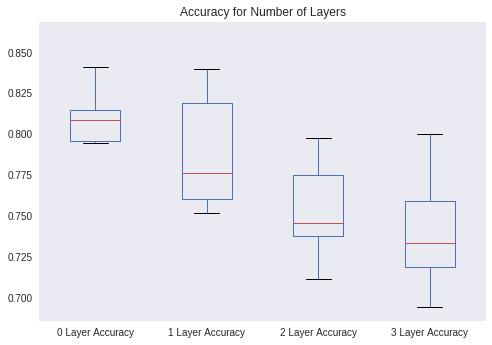

In [0]:
fig = plt.figure();
layers_df.boxplot(column = ["0 Layer Accuracy", "1 Layer Accuracy", "2 Layer Accuracy", "3 Layer Accuracy"], grid = False);
plt.title("Accuracy for Number of Layers");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/layer_accuracy_nonaugmented")

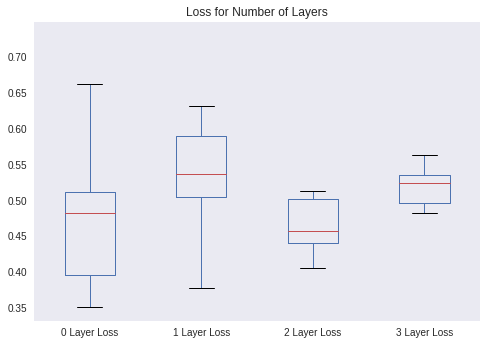

In [0]:
fig = plt.figure();
layers_df.boxplot(column = ["0 Layer Loss", "1 Layer Loss", "2 Layer Loss", "3 Layer Loss"], grid = False);
plt.title("Loss for Number of Layers");

In [0]:
fig.savefig("/content/gdrive/My Drive/Output/CV_Plots/layer_loss_nonaugmented")

# Image Augmentation

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
cv_loss1 = []
cv_accuracy1 = []
cv_auc1 = []

cv_loss2 = []
cv_accuracy2 = []
cv_auc2 = []

cv_loss3 = []
cv_accuracy3 = []
cv_auc3 = []

cv_loss4 = []
cv_accuracy4 = []
cv_auc4 = []

data_gen_args = dict(horizontal_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zca_whitening=False)

image_datagen = ImageDataGenerator(**data_gen_args)

## Image Augmentation - Layers

No time for Cross-Validation :(

In [0]:
data_gen_args = dict(horizontal_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1)
image_datagen = ImageDataGenerator(**data_gen_args)
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)

### Shallow Model

In [0]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(2, 2), 
                 strides=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(num_classes, activation='sigmoid'))

model1.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])
  

In [0]:
hist = model1.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 58s 4s/step - loss: 0.7936 - acc: 0.5547 - val_loss: 0.7344 - val_acc: 0.4933
Epoch 2/25
14/14 [==============================] - 51s 4s/step - loss: 0.7128 - acc: 0.5609 - val_loss: 0.7071 - val_acc: 0.5876
Epoch 3/25
14/14 [==============================] - 48s 3s/step - loss: 0.6828 - acc: 0.5580 - val_loss: 0.6702 - val_acc: 0.5944
Epoch 4/25
14/14 [==============================] - 47s 3s/step - loss: 0.6485 - acc: 0.6098 - val_loss: 0.6430 - val_acc: 0.6326
Epoch 5/25
14/14 [==============================] - 50s 4s/step - loss: 0.6488 - acc: 0.5945 - val_loss: 0.6179 - val_acc: 0.6506
Epoch 6/25
14/14 [==============================] - 50s 4s/step - loss: 0.6548 - acc: 0.5939 - val_loss: 0.6280 - val_acc: 0.6483
Epoch 7/25
14/14 [==============================] - 48s 3s/step - loss: 0.6547 - acc: 0.5888 - val_loss: 0.6178 - val_acc: 0.6326
Epoch 8/25
14/14 [==============================] - 47s 3s/step - loss: 0.6241 - acc: 0.60

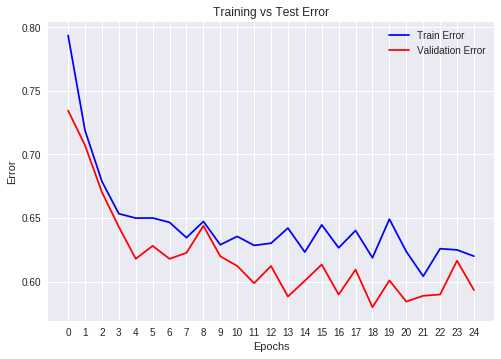

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers0_augmented_withmasks.png")

In [0]:
predictions = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers0_augmented0_predictions", predictions)

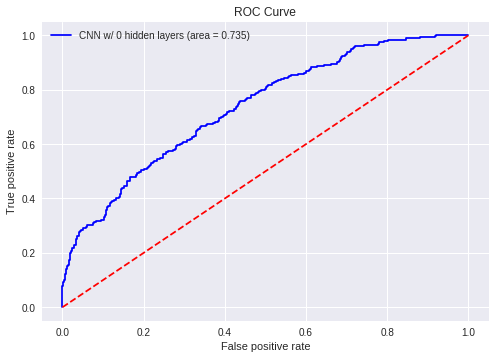

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 0 hidden layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers0_augmented_withmasks.png")

### Add Convolutional Layer

In [0]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Dropout(0.3))
model2.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2,2),
                 activation='relu'))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(num_classes, activation='sigmoid'))

model2.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model2.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 73s 5s/step - loss: 0.6759 - acc: 0.5615 - val_loss: 0.6511 - val_acc: 0.6393
Epoch 2/25
14/14 [==============================] - 72s 5s/step - loss: 0.6620 - acc: 0.5742 - val_loss: 0.6347 - val_acc: 0.6382
Epoch 3/25
14/14 [==============================] - 68s 5s/step - loss: 0.6430 - acc: 0.6120 - val_loss: 0.6243 - val_acc: 0.6517
Epoch 4/25
14/14 [==============================] - 68s 5s/step - loss: 0.6570 - acc: 0.5907 - val_loss: 0.6464 - val_acc: 0.6483
Epoch 5/25
14/14 [==============================] - 65s 5s/step - loss: 0.6525 - acc: 0.6062 - val_loss: 0.6173 - val_acc: 0.6382
Epoch 6/25
14/14 [==============================] - 67s 5s/step - loss: 0.6603 - acc: 0.6052 - val_loss: 0.6439 - val_acc: 0.6562
Epoch 7/25
14/14 [==============================] - 68s 5s/step - loss: 0.6377 - acc: 0.6277 - val_loss: 0.6290 - val_acc: 0.6258
Epoch 8/25
14/14 [==============================] - 68s 5s/step - loss: 0.6418 - acc: 0.58

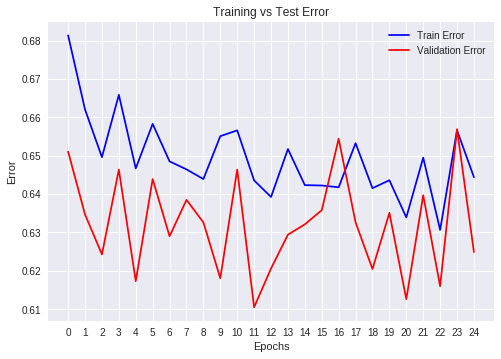

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers1_augmented_withmasks.png")

In [0]:
predictions = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers1_augmented0_predictions", predictions)

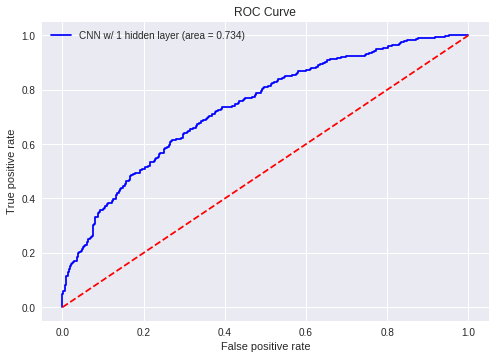

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 1 hidden layer (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers1_augmented_withmasks.png")

### Add Pooling Layer

In [0]:
model3 = Sequential()
model3.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Dropout(0.3))
model3.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(num_classes, activation='sigmoid'))

model3.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model3.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 70s 5s/step - loss: 0.6696 - acc: 0.5838 - val_loss: 0.6651 - val_acc: 0.6348
Epoch 2/25
14/14 [==============================] - 67s 5s/step - loss: 0.6688 - acc: 0.5923 - val_loss: 0.6670 - val_acc: 0.6056
Epoch 3/25
14/14 [==============================] - 68s 5s/step - loss: 0.6530 - acc: 0.6097 - val_loss: 0.6531 - val_acc: 0.5831
Epoch 4/25
14/14 [==============================] - 68s 5s/step - loss: 0.6363 - acc: 0.6311 - val_loss: 0.6489 - val_acc: 0.6303
Epoch 5/25
14/14 [==============================] - 66s 5s/step - loss: 0.6532 - acc: 0.6210 - val_loss: 0.6539 - val_acc: 0.6157
Epoch 6/25
14/14 [==============================] - 67s 5s/step - loss: 0.6616 - acc: 0.5794 - val_loss: 0.6590 - val_acc: 0.6034
Epoch 7/25
14/14 [==============================] - 68s 5s/step - loss: 0.6556 - acc: 0.6033 - val_loss: 0.6563 - val_acc: 0.6360
Epoch 8/25
14/14 [==============================] - 68s 5s/step - loss: 0.6442 - acc: 0.59

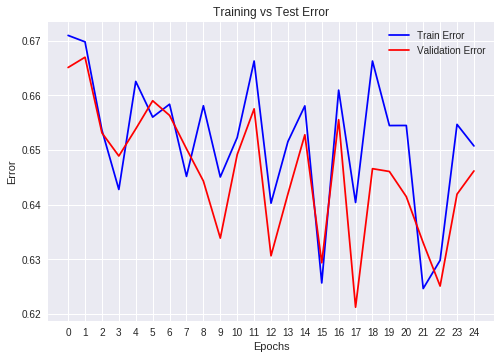

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers2_augmented_withmasks.png")

In [0]:
predictions = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers2_augmented0_predictions", predictions)

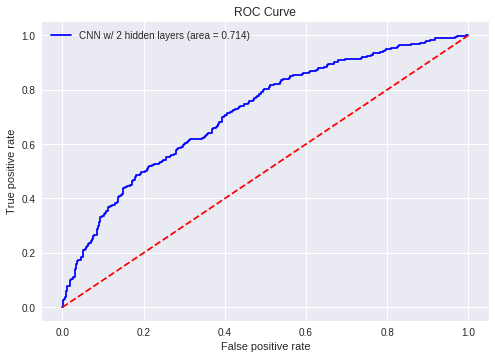

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 2 layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers2_augmented_withmasks.png")

### Add Another Pooling Layer

In [0]:
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Dropout(0.3))
model4.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Flatten())
model4.add(Dense(num_classes, activation='sigmoid'))

model4.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model4.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 73s 5s/step - loss: 0.6819 - acc: 0.5604 - val_loss: 0.6777 - val_acc: 0.6112
Epoch 2/25
14/14 [==============================] - 66s 5s/step - loss: 0.6535 - acc: 0.6058 - val_loss: 0.6639 - val_acc: 0.6382
Epoch 3/25
14/14 [==============================] - 66s 5s/step - loss: 0.6666 - acc: 0.5681 - val_loss: 0.6737 - val_acc: 0.5618
Epoch 4/25
14/14 [==============================] - 68s 5s/step - loss: 0.6712 - acc: 0.5557 - val_loss: 0.6753 - val_acc: 0.6326
Epoch 5/25
14/14 [==============================] - 69s 5s/step - loss: 0.6480 - acc: 0.6115 - val_loss: 0.6659 - val_acc: 0.6584
Epoch 6/25
14/14 [==============================] - 68s 5s/step - loss: 0.6595 - acc: 0.5901 - val_loss: 0.6646 - val_acc: 0.6618
Epoch 7/25
14/14 [==============================] - 67s 5s/step - loss: 0.6591 - acc: 0.5911 - val_loss: 0.6708 - val_acc: 0.6719
Epoch 8/25
14/14 [==============================] - 68s 5s/step - loss: 0.6580 - acc: 0.61

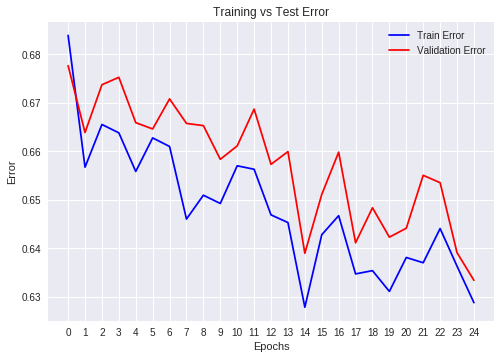

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers3_augmented_withmasks.png")

In [0]:
predictions = model4.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers3_augmented0_predictions", predictions)

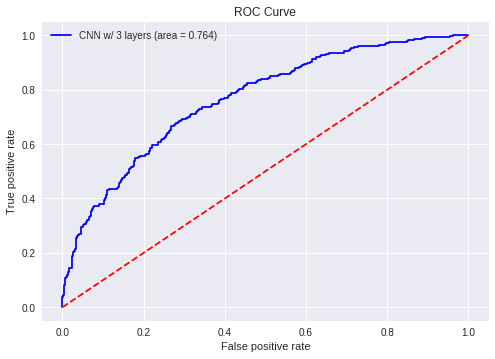

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 3 layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers3_augmented_withmasks.png")

In [0]:
predictions1 = np.load("gdrive/My Drive/Data/layers0_augmented0_predictions.npy")
predictions2 = np.load("gdrive/My Drive/Data/layers1_augmented0_predictions.npy")
predictions3 = np.load("gdrive/My Drive/Data/layers2_augmented0_predictions.npy")
predictions4 = np.load("gdrive/My Drive/Data/layers3_augmented0_predictions.npy")

In [0]:
fpr1, tpr1, thresholds1 = roc_curve(y_test.ravel(), predictions1.ravel())
model_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = roc_curve(y_test.ravel(), predictions2.ravel())
model_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = roc_curve(y_test.ravel(), predictions3.ravel())
model_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = roc_curve(y_test.ravel(), predictions4.ravel())
model_auc4 = auc(fpr4, tpr4)

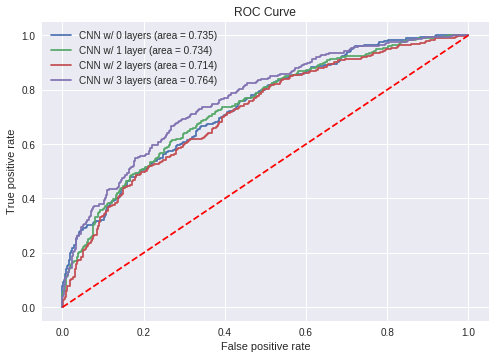

In [0]:
fig = plt.figure()
plt.plot(fpr1, tpr1, label = "CNN w/ 0 layers (area = {:.3f})".format(model_auc1));
plt.plot(fpr2, tpr2, label = "CNN w/ 1 layer (area = {:.3f})".format(model_auc2));
plt.plot(fpr3, tpr3, label = "CNN w/ 2 layers (area = {:.3f})".format(model_auc3));
plt.plot(fpr4, tpr4, label = "CNN w/ 3 layers (area = {:.3f})".format(model_auc4));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_compiled_layers_augmented_withmasks.png")

## Different Image Augmentation

In [0]:
data_gen_args = dict(horizontal_flip=True)
image_datagen = ImageDataGenerator(**data_gen_args)
image_generator = image_datagen.flow(x = X_train, y = y_train, batch_size = batch_size)

### Shallow Model

In [0]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(2, 2), 
                 strides=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(num_classes, activation='sigmoid'))

model1.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])
  

In [0]:
hist = model1.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 45s 3s/step - loss: 0.6768 - acc: 0.6244 - val_loss: 0.6084 - val_acc: 0.6213
Epoch 2/25
14/14 [==============================] - 43s 3s/step - loss: 0.5809 - acc: 0.7223 - val_loss: 0.5873 - val_acc: 0.6764
Epoch 3/25
14/14 [==============================] - 42s 3s/step - loss: 0.5074 - acc: 0.7267 - val_loss: 0.5988 - val_acc: 0.6607
Epoch 4/25
14/14 [==============================] - 42s 3s/step - loss: 0.4877 - acc: 0.7688 - val_loss: 0.5297 - val_acc: 0.6921
Epoch 5/25
14/14 [==============================] - 43s 3s/step - loss: 0.3913 - acc: 0.8604 - val_loss: 0.5342 - val_acc: 0.7000
Epoch 6/25
14/14 [==============================] - 42s 3s/step - loss: 0.3571 - acc: 0.8777 - val_loss: 0.5504 - val_acc: 0.6888
Epoch 7/25
14/14 [==============================] - 42s 3s/step - loss: 0.3094 - acc: 0.8861 - val_loss: 0.5486 - val_acc: 0.7034
Epoch 8/25
14/14 [==============================] - 42s 3s/step - loss: 0.3316 - acc: 0.87

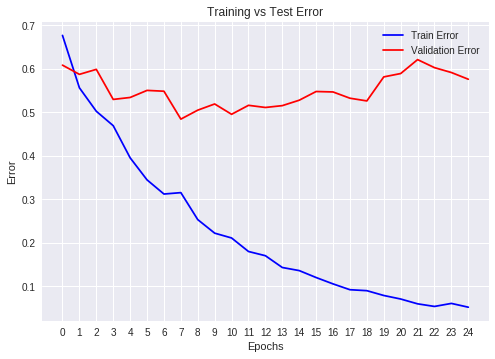

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers0_augmented1_withmasks.png")

In [0]:
predictions = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers0_augmented1_predictions", predictions)

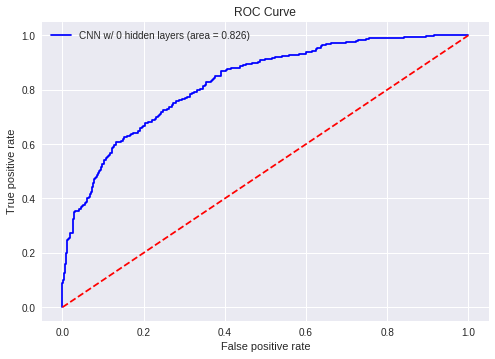

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 0 hidden layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers0_augmented1_withmasks.png")

### Add Convolutional Layer

In [0]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Dropout(0.3))
model2.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2,2),
                 activation='relu'))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(num_classes, activation='sigmoid'))

model2.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model2.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 60s 4s/step - loss: 0.6482 - acc: 0.5844 - val_loss: 0.6074 - val_acc: 0.6551
Epoch 2/25
14/14 [==============================] - 63s 4s/step - loss: 0.6002 - acc: 0.6283 - val_loss: 0.6258 - val_acc: 0.6461
Epoch 3/25
14/14 [==============================] - 59s 4s/step - loss: 0.5700 - acc: 0.6578 - val_loss: 0.6017 - val_acc: 0.6596
Epoch 4/25
14/14 [==============================] - 59s 4s/step - loss: 0.5585 - acc: 0.6690 - val_loss: 0.5654 - val_acc: 0.6753
Epoch 5/25
14/14 [==============================] - 60s 4s/step - loss: 0.5346 - acc: 0.7140 - val_loss: 0.5717 - val_acc: 0.6798
Epoch 6/25
14/14 [==============================] - 61s 4s/step - loss: 0.4783 - acc: 0.7477 - val_loss: 0.5645 - val_acc: 0.6944
Epoch 7/25
14/14 [==============================] - 61s 4s/step - loss: 0.4436 - acc: 0.8111 - val_loss: 0.5425 - val_acc: 0.7112
Epoch 8/25
14/14 [==============================] - 60s 4s/step - loss: 0.4180 - acc: 0.80

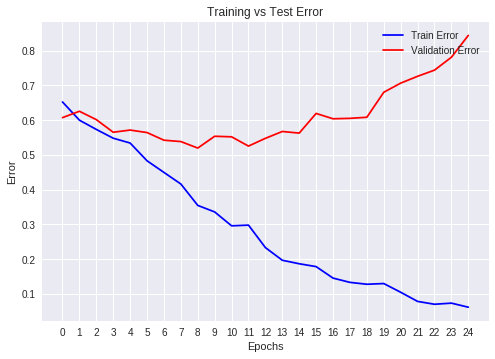

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers1_augmented1_withmasks.png")

In [0]:
predictions = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers1_augmented1_predictions", predictions)

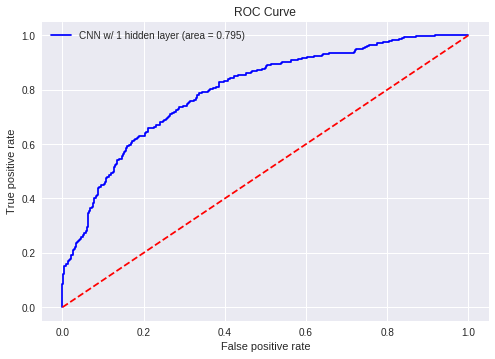

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 1 hidden layer (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers1_augmented1_withmasks.png")

### Add Pooling Layer

In [0]:
model3 = Sequential()
model3.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Dropout(0.3))
model3.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(num_classes, activation='sigmoid'))

model3.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model3.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 72s 5s/step - loss: 0.6478 - acc: 0.5898 - val_loss: 0.6194 - val_acc: 0.6551
Epoch 2/25
14/14 [==============================] - 62s 4s/step - loss: 0.6044 - acc: 0.6529 - val_loss: 0.6244 - val_acc: 0.6584
Epoch 3/25
14/14 [==============================] - 61s 4s/step - loss: 0.5989 - acc: 0.6274 - val_loss: 0.6228 - val_acc: 0.6494
Epoch 4/25
14/14 [==============================] - 59s 4s/step - loss: 0.5752 - acc: 0.6680 - val_loss: 0.6072 - val_acc: 0.6438
Epoch 5/25
14/14 [==============================] - 59s 4s/step - loss: 0.5899 - acc: 0.6438 - val_loss: 0.6076 - val_acc: 0.6854
Epoch 6/25
14/14 [==============================] - 60s 4s/step - loss: 0.5607 - acc: 0.7053 - val_loss: 0.5828 - val_acc: 0.6831
Epoch 7/25
14/14 [==============================] - 60s 4s/step - loss: 0.5595 - acc: 0.7112 - val_loss: 0.6023 - val_acc: 0.6652
Epoch 8/25
14/14 [==============================] - 60s 4s/step - loss: 0.5314 - acc: 0.73

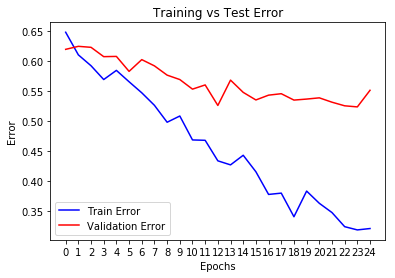

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "lower left");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers2_augmented1_withmasks_epochs25.png")

In [0]:
predictions = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers2_augmented1_predictions", predictions)

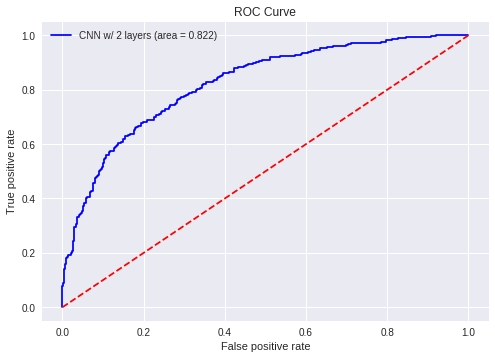

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 2 layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers2_augmented1_withmasks.png")

### Add Another Pooling Layer

In [0]:
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Dropout(0.3))
model4.add(Conv2D(64, kernel_size=(2, 2),
                 strides=(2, 2),
                 activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(Flatten())
model4.add(Dense(num_classes, activation='sigmoid'))

model4.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=['accuracy'])

In [0]:
hist = model4.fit_generator(
    generator = image_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=25)

Epoch 1/25
14/14 [==============================] - 61s 4s/step - loss: 0.6620 - acc: 0.5836 - val_loss: 0.6676 - val_acc: 0.5764
Epoch 2/25
14/14 [==============================] - 60s 4s/step - loss: 0.6246 - acc: 0.6284 - val_loss: 0.6411 - val_acc: 0.6326
Epoch 3/25
14/14 [==============================] - 59s 4s/step - loss: 0.6012 - acc: 0.6388 - val_loss: 0.6412 - val_acc: 0.6551
Epoch 4/25
14/14 [==============================] - 63s 5s/step - loss: 0.5895 - acc: 0.6390 - val_loss: 0.6410 - val_acc: 0.6371
Epoch 5/25
14/14 [==============================] - 59s 4s/step - loss: 0.6009 - acc: 0.6302 - val_loss: 0.6368 - val_acc: 0.6371
Epoch 6/25
14/14 [==============================] - 59s 4s/step - loss: 0.5822 - acc: 0.6643 - val_loss: 0.6371 - val_acc: 0.6315
Epoch 7/25
14/14 [==============================] - 60s 4s/step - loss: 0.5897 - acc: 0.6668 - val_loss: 0.6283 - val_acc: 0.6506
Epoch 8/25
14/14 [==============================] - 60s 4s/step - loss: 0.5861 - acc: 0.64

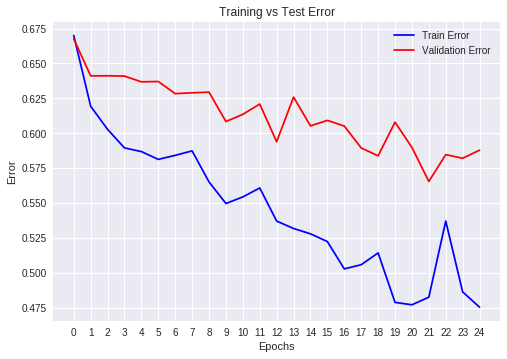

In [0]:
fig = plt.figure()
plt.plot(hist.history["loss"], 'b', label = "Train Error");
plt.plot(hist.history["val_loss"], 'r', label = "Validation Error");
plt.title("Training vs Test Error");
plt.legend(loc = "upper right");
plt.xticks(np.arange(0, 25, 1));
plt.xlabel("Epochs");
plt.ylabel("Error");

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/errorplot_layers3_augmented1_withmasks.png")

In [0]:
predictions = model4.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.ravel())
model_auc = auc(fpr, tpr)

In [0]:
np.save("gdrive/My Drive/Data/layers3_augmented1_predictions", predictions)

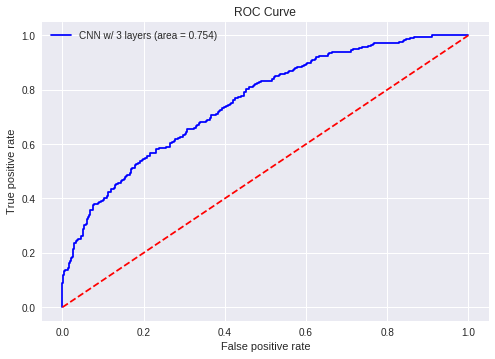

In [0]:
fig = plt.figure()
plt.plot(fpr, tpr, 'b-', label = "CNN w/ 3 layers (area = {:.3f})".format(model_auc));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_layers3_augmented1_withmasks.png")

In [0]:
predictions1 = np.load("gdrive/My Drive/Data/layers0_augmented1_predictions.npy")
predictions2 = np.load("gdrive/My Drive/Data/layers1_augmented1_predictions.npy")
predictions3 = np.load("gdrive/My Drive/Data/layers2_augmented1_predictions.npy")
predictions4 = np.load("gdrive/My Drive/Data/layers3_augmented1_predictions.npy")

In [0]:
fpr1, tpr1, thresholds1 = roc_curve(y_test.ravel(), predictions1.ravel())
model_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = roc_curve(y_test.ravel(), predictions2.ravel())
model_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = roc_curve(y_test.ravel(), predictions3.ravel())
model_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = roc_curve(y_test.ravel(), predictions4.ravel())
model_auc4 = auc(fpr4, tpr4)

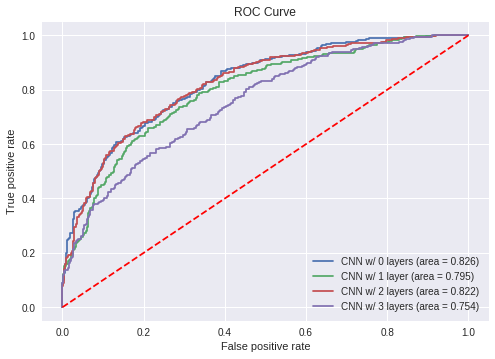

In [0]:
fig = plt.figure()
plt.plot(fpr1, tpr1, label = "CNN w/ 0 layers (area = {:.3f})".format(model_auc1));
plt.plot(fpr2, tpr2, label = "CNN w/ 1 layer (area = {:.3f})".format(model_auc2));
plt.plot(fpr3, tpr3, label = "CNN w/ 2 layers (area = {:.3f})".format(model_auc3));
plt.plot(fpr4, tpr4, label = "CNN w/ 3 layers (area = {:.3f})".format(model_auc4));
plt.plot([0, 1], [0, 1], 'r--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.title('ROC Curve');
plt.legend(loc='best');

In [0]:
fig.savefig("gdrive/My Drive/Output/MRI_Prediction_Plots/roc_compiled_layers_augmented1_withmasks.png")